In [7]:
# This is a real example from some separate, real work. Models 
# not provided.
import os
import logging
logging.getLogger().setLevel(logging.INFO)
logging.basicConfig(format='%(message)s')

import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn import preprocessing
from polyga import polygod as pg
from polyga.selection_schemes import elite


# These functions would be replaced by the user.
from rampiga.utils import fingerprint, load_dna, GPR, chromosome_ids_to_smiles

In [8]:
def predict(df, fp_headers, models):
    """Predict properties of the population"""
    extra_fps = {'exp_Dk': {'logf': 2}}
    cols = df.columns
    predictions = []
    for index, row in df.iterrows():
        fingerprint = row[fp_headers].to_dict()
        prediction = {}
        for model in models:
            # add extra fingerprints
            if model in extra_fps:
                for extra_print in extra_fps[model]:
                    fingerprint[extra_print] = extra_fps[model][extra_print]
            Y = GPR(fingerprint, models[model])
            prediction[model] = Y['y']
            prediction[model + '_std'] = Y['uncertainty']
        if pd.isnull(Y['y']) or pd.isnull(Y['uncertainty']):                 
            pass
        else:
            for col in cols:
                prediction[col] = row[col]
            predictions.append(prediction)
    new_population = pd.DataFrame(predictions)
    return new_population

In [11]:
def multi_property_clamping_fitness_function(df, fp_headers):
    """Encourage the evolution of polymers with five property thresholds

    Tg > 500 K, Eg > 5 eV, CED < 80 cal/cc, Dk > 4, and EIB > 3 eV
    """
    tgs = df.exp_Tg.values
    # Those with values larger than 500 K will have highest fitness score
    tgs = [min(tg, 500) for tg in tgs]
    tgs = np.array(tgs)
    # Reshape for processing
    tgs = np.reshape(tgs,(len(tgs),-1))
    scaler = preprocessing.MinMaxScaler()
    # Scale so all values between 0 and 1
    tgs = scaler.fit_transform(tgs)

    egs = df.exp_Eg.values
    # Those with values larger than 5 eV will have highest fitness score
    egs = [min(eg, 5) for eg in egs]
    egs = np.array(egs)
    # Reshape for processing
    egs = np.reshape(egs,(len(egs),-1))
    scaler = preprocessing.MinMaxScaler()
    # Scale so all values between 0 and 1
    egs = scaler.fit_transform(egs)

    dks = df.exp_Dk.values
    # Those with values larger than 4 will have highest fitness score
    dks = [min(dk, 4) for dk in dks]
    dks = np.array(dks)
    # Reshape for processing
    dks = np.reshape(dks,(len(dks),-1))
    scaler = preprocessing.MinMaxScaler()
    # Scale so all values between 0 and 1
    dks = scaler.fit_transform(dks)

    ceds = df.exp_CED.values
    # Those with values less than 80 cal/cc will have highest fitness score
    ceds = [-1*max(ced, 80) for ced in ceds]
    ceds = np.array(ceds)
    # Reshape for processing
    ceds = np.reshape(ceds,(len(ceds),-1))
    scaler = preprocessing.MinMaxScaler()
    # Scale so all values between 0 and 1
    ceds = scaler.fit_transform(ceds)

    eibs = df.exp_EIB.values
    # Those with values larger than 3 eV will have highest fitness score
    eibs = [min(3, eib) for eib in eibs]
    eibs = np.array(eibs)
    # Reshape for processing
    eibs = np.reshape(eibs,(len(eibs),-1))
    scaler = preprocessing.MinMaxScaler()
    # Scale so all values between 0 and 1
    eibs = scaler.fit_transform(eibs)

    scores = []
    # Linear combination of values
    for i in range(len(tgs)):
        tg = tgs[i][0]
        eg = egs[i][0]
        ced = ceds[i][0]
        eib = eibs[i][0]
        dk = dks[i][0]

        score = 0.2*tg + 0.2*eg + 0.2*ced + 0.2*eib + 0.2*dk
        scores.append(score)

    df['fitness'] = scores

    return df

In [12]:
# have a folder called 'models' in this folder
models = os.listdir('models')
models = [model for model in models if '.' not in model]
GPR_models = {model: joblib.load(os.path.join('models', 
        model, 'model.pkl')) for  model in models}
planet = pg.PolyPlanet('Clamprth', predict, fingerprint, 
                       path_to_dna=load_dna(), models=GPR_models)

land = pg.PolyLand('Clampland', planet, 
                   generative_function=chromosome_ids_to_smiles,
                   fitness_function=multi_property_clamping_fitness_function
)

nation = pg.PolyNation('Clamperton', land, selection_scheme=elite, 
                       partner_selection='diversity', num_population_initial=100)

planet.advance_time()

Age of planet Clamprth: 0
The polymers of Clamperton took 30.7419 years to mature.
The polymers of Clamperton took 2.5559 years to graduate college.
The polymers of Clamperton worked for 0.003 years.
No other nations exist for the polymers of Clamperton to immigrate to
Age of land Clampland is 0
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0072 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.2263 years to finish their census!
There are 81 polymers in the nation
After 0.0646 years they had children.
Generation 0 of Clamperton have all passed away


In [13]:
# Advance time over 9 generations
for i in range(9):
    planet.advance_time()

Age of planet Clamprth: 1
The polymers of Clamperton took 46.0481 years to mature.
The polymers of Clamperton took 3.791 years to graduate college.
The polymers of Clamperton worked for 0.0066 years.
No other nations exist for the polymers of Clamperton to immigrate to
Age of land Clampland is 1
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0056 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.3008 years to finish their census!
There are 138 polymers in the nation
After 0.0688 years they had children.
Generation 1 of Clamperton have all passed away
Age of planet Clamprth: 2
The polymers of Clamperton took 46.2759 years to mature.
The polymers of Clamperton took 6.4616 years to graduate college.
The polymers of Clamperton worked for 0.0041 years.
No other nations exist for the polymers of Clamperton to immigrate to
Age of land Clampland is 2
Clamperton of Clampland advances through time
The polymers of Clamperton worke

In [15]:
import matplotlib.pyplot as plt
import polyga.analysis as pga

In [16]:
def plot_average_lengths(df):
    """Plots average lengths of polymers vs generation for all settled_nations"""
    gens = max(df.generation) + 1
    x = np.linspace(0, gens, gens)
    settled_nations = np.unique(df.settled_nation.values)
    legend = []
    for settled_nation in settled_nations:
        tdf = df.loc[df['settled_nation'] == settled_nation]
        means = []
        for gen in range(gens):
            tdf_ = tdf.loc[tdf['generation'] == gen]
            mean = tdf_.num_chromosomes.mean()
            means.append(mean)
        plt.plot(x, means)
        legend.append(settled_nation)
    plt.legend(legend)
    plt.show()

In [17]:
def plot_property_averages(df):
    """Plots property averages for all settled_nations and displays them separately."""
    properties = ['exp_Tg', 'exp_Eg', 'exp_Dk', 'exp_CED', 'exp_EIB']
    #properties = ['Polymer_Coolness', 'Polymer_Funnyness','Polymer_Intelligence']
    goals = [500, 5, 4, 80, 3]
    dirs = [1, 1, 1, -1, 1]
    settled_nations = np.unique(df.settled_nation.values)
    for settled_nation in settled_nations:
        vals = []
        tdf = df.loc[df.settled_nation == settled_nation]
        for prop in properties:
            val = []
            for i in range(max(tdf.generation) + 1):
                tdf_ = tdf.loc[tdf['generation'] == i]
                val.append(tdf_[prop].mean())
            vals.append(val)

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[16,9])
        x = np.linspace(0, max(tdf.generation), max(tdf.generation)+1)
        x = [val + 1 for val in x]
        row = 0
        col = 0
        curr = 0
        for prop in properties:
            upper_line = [max(vals[curr])]*len(x)
            lower_line = [min(vals[curr])]*len(x)
            axes[row][col].plot(x, vals[curr], lw=2, c='darkred', zorder=4)
            axes[row][col].set_ylabel(prop)
            axes[row][col].set_ylim([min(min(vals[curr]), goals[curr]),
                                     max(max(vals[curr]), goals[curr])])
            axes[row][col].set_xlim([1,max(tdf.generation)+1])
            axes[row][col].set_xscale("log")
            goal_line = [goals[curr]]*len(x)
            if (dirs[curr] == 1 and max(vals[curr]) > goals[curr]):
                axes[row][col].fill_between(x,goal_line,upper_line,zorder=3,alpha=.5,
                                 facecolor='gray')
            elif (dirs[curr] == -1 and min(vals[curr]) < goals[curr]):
                axes[row][col].fill_between(x,lower_line,goal_line,zorder=3,alpha=.5,
                                 facecolor='gray')
            curr += 1
            col += 1
            if col > 2:
                col = 0
                row += 1
        fig.delaxes(axes[1][2])
        fig.suptitle(settled_nation)
        plt.show()

In [18]:
def count_num_successful_pols(df):
    """Counts all polymers achieving targets"""
    properties = ['exp_Tg', 'exp_Eg', 'exp_Dk', 'exp_CED', 'exp_EIB']
    goals = [500, 5, 4, 80, 3]
    dirs = [1, 1, 1, -1, 1]
    settled_nations = np.unique(df.settled_nation.values)
    for settled_nation in settled_nations:
        tdf = df.loc[df.settled_nation == settled_nation]
        num_pols = len(tdf)
        for i in range(len(goals)):
            goal = goals[i]
            dir_ = dirs[i]
            prop = properties[i]
            if dir_ == 1:
                tdf = tdf.loc[tdf[prop] >= goal]
            else: 
                tdf = tdf.loc[tdf[prop] <= goal]
        print("{}: {} / {}".format(settled_nation, len(tdf), num_pols)) 

In [19]:
df, fp_df = pga.load_planet('Clamprth')

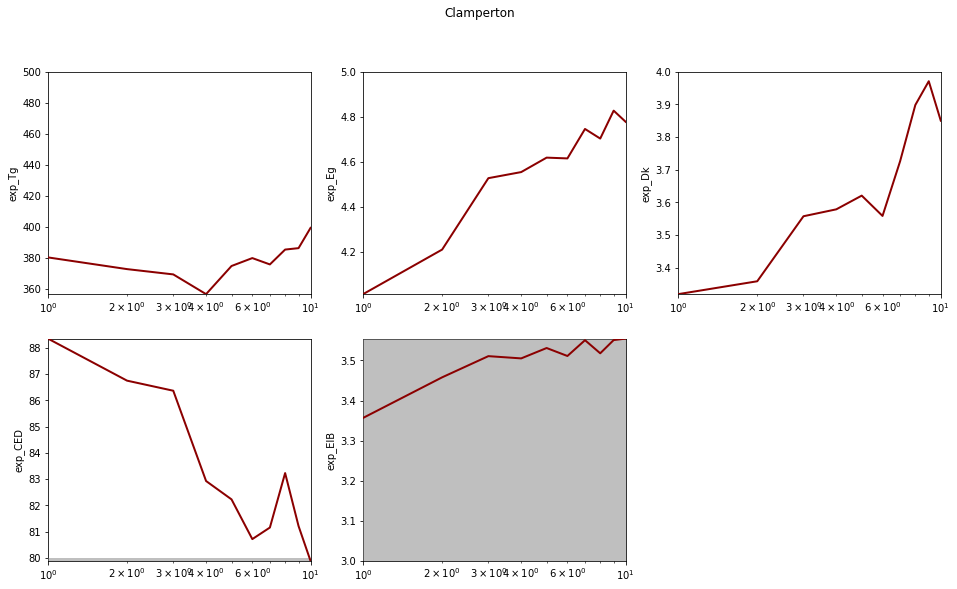

In [20]:
plot_property_averages(df)

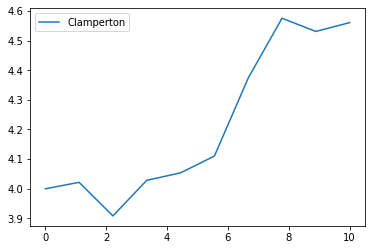

In [21]:
plot_average_lengths(df)

In [22]:
count_num_successful_pols(df)

Clamperton: 0 / 1413


In [23]:
for i in range(10):
    planet.advance_time()

Age of planet Clamprth: 10
The polymers of Clamperton took 44.1647 years to mature.
The polymers of Clamperton took 4.0604 years to graduate college.
The polymers of Clamperton worked for 0.0036 years.
No other nations exist for the polymers of Clamperton to immigrate to
Age of land Clampland is 10
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0048 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.2577 years to finish their census!
There are 150 polymers in the nation
After 0.0665 years they had children.
Generation 10 of Clamperton have all passed away
Age of planet Clamprth: 11
The polymers of Clamperton took 44.4486 years to mature.
The polymers of Clamperton took 4.6041 years to graduate college.
The polymers of Clamperton worked for 0.0025 years.
No other nations exist for the polymers of Clamperton to immigrate to
Age of land Clampland is 11
Clamperton of Clampland advances through time
The polymers of Clamperton

In [24]:
df, fp_df = pga.load_planet('Clamprth')

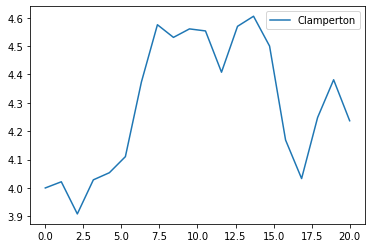

In [25]:
plot_average_lengths(df)

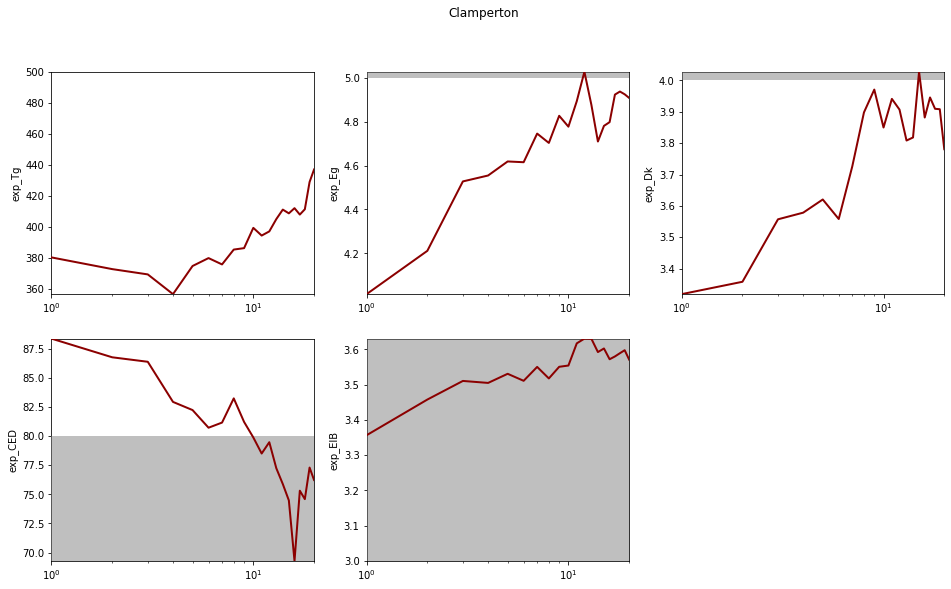

In [26]:
plot_property_averages(df)

In [27]:
def max_glass_transition_fitness_function(df, fp_headers):
    """Encourage the evolution of polymers with max Tgs"""
    tgs = df.exp_Tg.values
    tgs = np.array(tgs)
    # Reshape for processing
    tgs = np.reshape(tgs,(len(tgs),-1))
    scaler = preprocessing.MinMaxScaler()
    # Scale so all values between 0 and 1
    tgs = scaler.fit_transform(tgs)

    scores = []
    # Linear combination of values
    for i in range(len(tgs)):
        tg = tgs[i][0]

        score = tg
        scores.append(score)
    df['fitness'] = scores

    return df

In [29]:
land2 = pg.PolyLand('TgLand', planet, 
                   generative_function=chromosome_ids_to_smiles,
                   fitness_function=max_glass_transition_fitness_function
)
nation2 = pg.PolyNation('Tgton', land2, selection_scheme=elite, 
                       partner_selection='diversity', num_population_initial=100,
                       emigration_rate=0.02, emigration_selection='best_worst',
)

In [31]:
nation.parent_migrant_percentage = 0.2
nation.emigration_rate = 0

In [32]:
for i in range(10):
    planet.advance_time()

Age of planet Clamprth: 20
The polymers of Clamperton took 64.1087 years to mature.
The polymers of Clamperton took 4.5435 years to graduate college.
The polymers of Clamperton worked for 0.0043 years.
The polymers of Clamperton emigrated over 0.0825 years.
The polymers of Tgton took 33.1997 years to mature.
The polymers of Tgton took 2.5818 years to graduate college.
The polymers of Tgton worked for 0.0016 years.
The polymers of Tgton emigrated over 0.0698 years.
Age of land Clampland is 20
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0028 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.3052 years to finish their census!
There are 160 polymers in the nation
After 0.1025 years they had children.
Generation 20 of Clamperton have all passed away
Age of land TgLand is 0
Tgton of TgLand advances through time
The polymers of Tgton worked for 0.0009 polyears.
The polymers of Tgton married!
The nation of Tgton took 0.1526 

The polymers of Clamperton emigrated over 0.0433 years.
The polymers of Tgton took 108.0921 years to mature.
The polymers of Tgton took 3.9295 years to graduate college.
The polymers of Tgton worked for 0.0014 years.
The polymers of Tgton emigrated over 0.0548 years.
Age of land Clampland is 27
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0033 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.2563 years to finish their census!
There are 153 polymers in the nation
After 0.0398 years they had children.
Generation 27 of Clamperton have all passed away
Age of land TgLand is 7
Tgton of TgLand advances through time
The polymers of Tgton worked for 0.001 polyears.
The polymers of Tgton married!
The nation of Tgton took 0.2312 years to finish their census!
There are 142 polymers in the nation
After 0.0369 years they had children.
Generation 7 of Tgton have all passed away
Age of planet Clamprth: 28
The polymers of Clamperton 

In [33]:
df, fp_df = pga.load_planet('Clamprth')

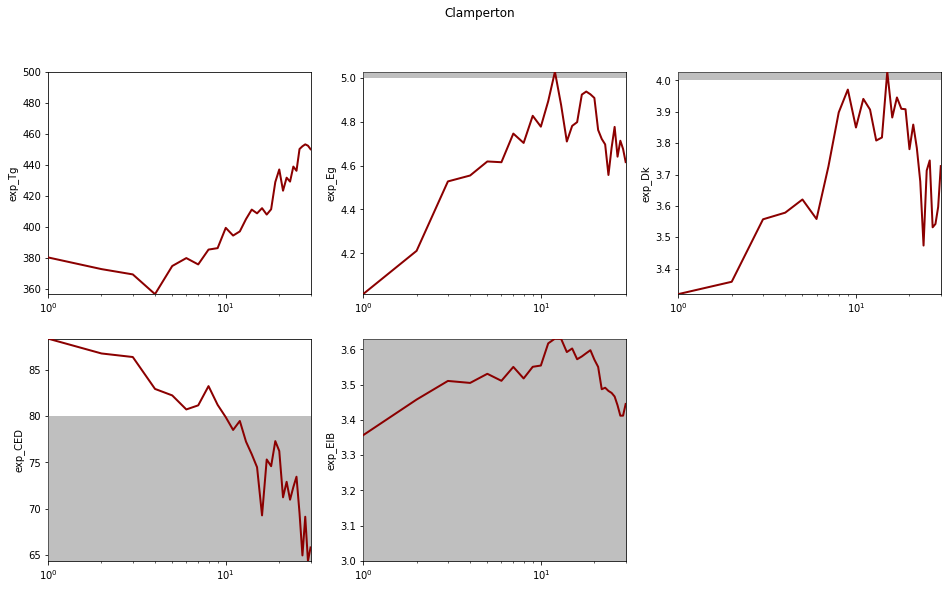

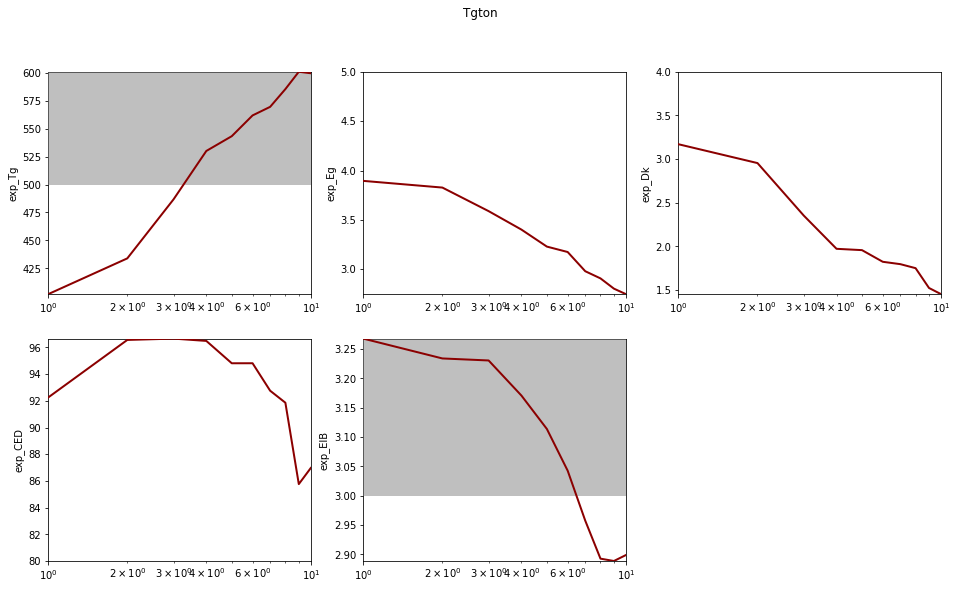

In [34]:
plot_property_averages(df)

In [44]:
def max_glass_transition_bandgap_dielectric_fitness_function(df, fp_headers):
    """Encourage the evolution of polymers with max Tgs"""
    tgs = df.exp_Tg.values
    tgs = np.array(tgs)
    # Reshape for processing
    tgs = np.reshape(tgs,(len(tgs),-1))
    scaler = preprocessing.MinMaxScaler()
    # Scale so all values between 0 and 1
    tgs = scaler.fit_transform(tgs)
    
    # Those with values larger than 4 will have highest fitness score
    dks = df.exp_Dk.values
    dks = [min(dk, 4) for dk in dks]
    dks = np.array(dks)
    # Reshape for processing
    dks = np.reshape(dks,(len(dks),-1))
    scaler = preprocessing.MinMaxScaler()
    # Scale so all values between 0 and 1
    dks = scaler.fit_transform(dks)

    egs = df.exp_Eg.values
    egs = [min(eg, 5) for eg in egs]
    # Those with values largest Eg will have highest fitness score
    egs = np.array(egs)
    # Reshape for processing
    egs = np.reshape(egs,(len(egs),-1))
    scaler = preprocessing.MinMaxScaler()
    # Scale so all values between 0 and 1
    egs = scaler.fit_transform(egs)

    scores = []
    # Linear combination of values
    for i in range(len(tgs)):
        tg = tgs[i][0]
        eg = egs[i][0]
        dk = dks[i][0]

        score = 0.8*tg + 0.1*eg + 0.1*dk
        scores.append(score)
    df['fitness'] = scores

    return df

In [37]:
land2.fitness_function = max_glass_transition_bandgap_dielectric_fitness_function

In [38]:
for i in range(10):
    planet.advance_time()

Age of planet Clamprth: 30
The polymers of Clamperton took 61.5112 years to mature.
The polymers of Clamperton took 5.4505 years to graduate college.
The polymers of Clamperton worked for 0.0162 years.
The polymers of Clamperton emigrated over 0.0748 years.
The polymers of Tgton took 119.7486 years to mature.
The polymers of Tgton took 3.8 years to graduate college.
The polymers of Tgton worked for 0.0017 years.
The polymers of Tgton emigrated over 0.0514 years.
Age of land Clampland is 30
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0063 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.2804 years to finish their census!
There are 148 polymers in the nation
After 0.0496 years they had children.
Generation 30 of Clamperton have all passed away
Age of land TgLand is 10
Tgton of TgLand advances through time
The polymers of Tgton worked for 0.0028 polyears.
The polymers of Tgton married!
The nation of Tgton took 0.2321 y

The polymers of Clamperton emigrated over 0.0548 years.
The polymers of Tgton took 40.1836 years to mature.
The polymers of Tgton took 4.2919 years to graduate college.
The polymers of Tgton worked for 0.0028 years.
The polymers of Tgton emigrated over 0.0494 years.
Age of land Clampland is 37
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0042 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.2466 years to finish their census!
There are 148 polymers in the nation
After 0.043 years they had children.
Generation 37 of Clamperton have all passed away
Age of land TgLand is 17
Tgton of TgLand advances through time
The polymers of Tgton worked for 0.0031 polyears.
The polymers of Tgton married!
The nation of Tgton took 0.2633 years to finish their census!
There are 154 polymers in the nation
After 0.0445 years they had children.
Generation 17 of Tgton have all passed away
Age of planet Clamprth: 38
The polymers of Clamperton

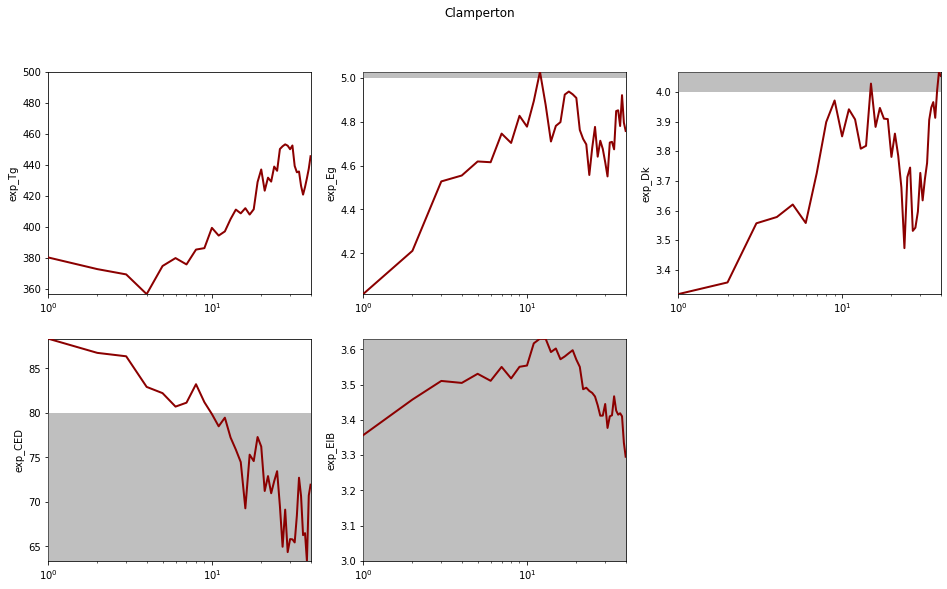

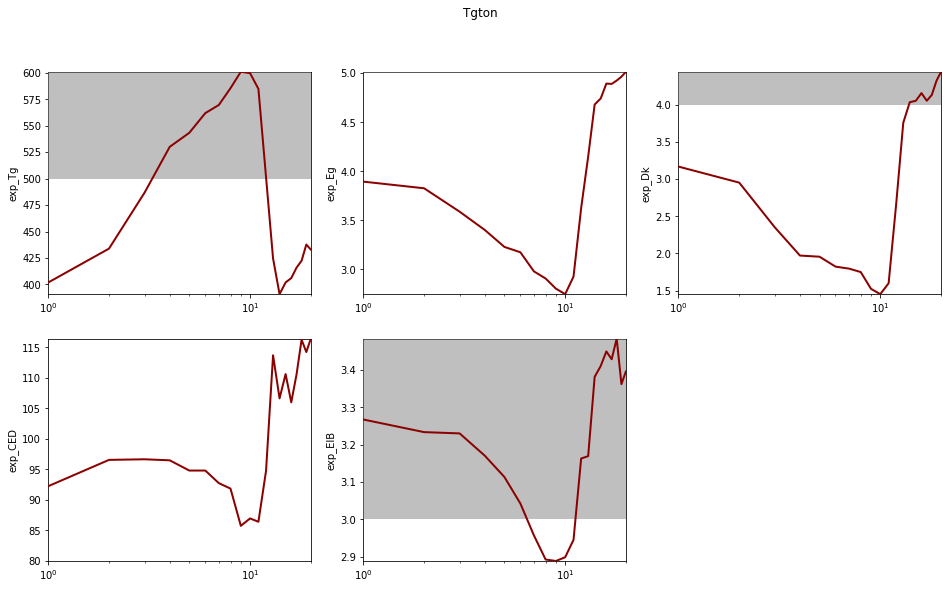

In [39]:
df, fp_df = pga.load_planet('Clamprth')
plot_property_averages(df)

Age of planet Clamprth: 40
The polymers of Clamperton took 51.0824 years to mature.
The polymers of Clamperton took 3.9938 years to graduate college.
The polymers of Clamperton worked for 0.0036 years.
The polymers of Clamperton emigrated over 0.1368 years.
The polymers of Tgton took 44.8474 years to mature.
The polymers of Tgton took 4.1917 years to graduate college.
The polymers of Tgton worked for 0.0022 years.
The polymers of Tgton emigrated over 0.0442 years.
Age of land Clampland is 40
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0046 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.2413 years to finish their census!
There are 146 polymers in the nation
After 0.0496 years they had children.
Generation 40 of Clamperton have all passed away
Age of land TgLand is 20
Tgton of TgLand advances through time
The polymers of Tgton worked for 0.0021 polyears.
The polymers of Tgton married!
The nation of Tgton took 0.2438

The polymers of Clamperton emigrated over 0.0511 years.
The polymers of Tgton took 37.6429 years to mature.
The polymers of Tgton took 4.2831 years to graduate college.
The polymers of Tgton worked for 0.0022 years.
The polymers of Tgton emigrated over 0.0432 years.
Age of land Clampland is 47
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0033 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.2516 years to finish their census!
There are 149 polymers in the nation
After 0.0501 years they had children.
Generation 47 of Clamperton have all passed away
Age of land TgLand is 27
Tgton of TgLand advances through time
The polymers of Tgton worked for 0.0016 polyears.
The polymers of Tgton married!
The nation of Tgton took 0.2507 years to finish their census!
There are 160 polymers in the nation
After 0.0361 years they had children.
Generation 27 of Tgton have all passed away
Age of planet Clamprth: 48
The polymers of Clamperto

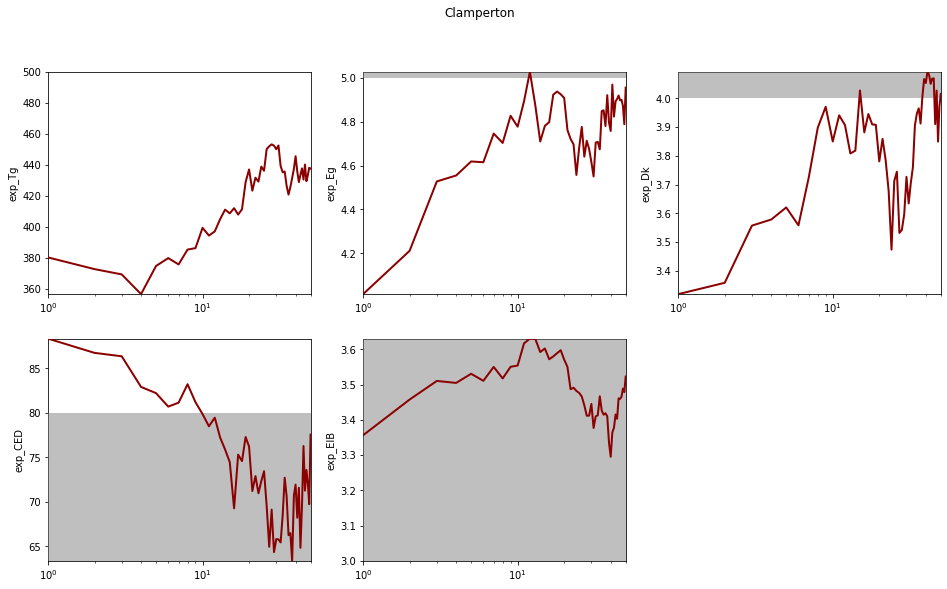

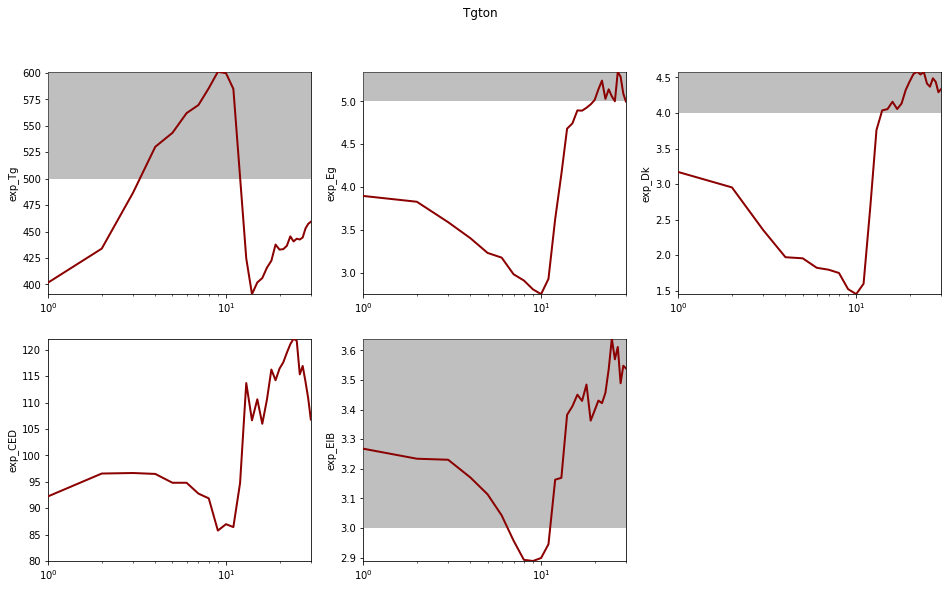

In [40]:
for i in range(10):
    planet.advance_time()   
df, fp_df = pga.load_planet('Clamprth')
plot_property_averages(df)

In [45]:
land2.fitness_function = max_glass_transition_bandgap_dielectric_fitness_function

Age of planet Clamprth: 50
The polymers of Clamperton took 45.6324 years to mature.
The polymers of Clamperton took 4.0546 years to graduate college.
The polymers of Clamperton worked for 0.0025 years.
The polymers of Clamperton emigrated over 0.0526 years.
The polymers of Tgton took 37.3067 years to mature.
The polymers of Tgton took 5.245 years to graduate college.
The polymers of Tgton worked for 0.0019 years.
The polymers of Tgton emigrated over 0.0455 years.
Age of land Clampland is 50
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0033 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.2399 years to finish their census!
There are 147 polymers in the nation
After 0.0429 years they had children.
Generation 50 of Clamperton have all passed away
Age of land TgLand is 30
Tgton of TgLand advances through time
The polymers of Tgton worked for 0.002 polyears.
The polymers of Tgton married!
The nation of Tgton took 0.2549 y

The polymers of Clamperton emigrated over 0.0417 years.
The polymers of Tgton took 41.1922 years to mature.
The polymers of Tgton took 4.5519 years to graduate college.
The polymers of Tgton worked for 0.0027 years.
The polymers of Tgton emigrated over 0.0547 years.
Age of land Clampland is 57
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0035 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.2368 years to finish their census!
There are 143 polymers in the nation
After 0.0413 years they had children.
Generation 57 of Clamperton have all passed away
Age of land TgLand is 37
Tgton of TgLand advances through time
The polymers of Tgton worked for 0.0023 polyears.
The polymers of Tgton married!
The nation of Tgton took 0.2708 years to finish their census!
There are 155 polymers in the nation
After 0.0435 years they had children.
Generation 37 of Tgton have all passed away
Age of planet Clamprth: 58
The polymers of Clamperto

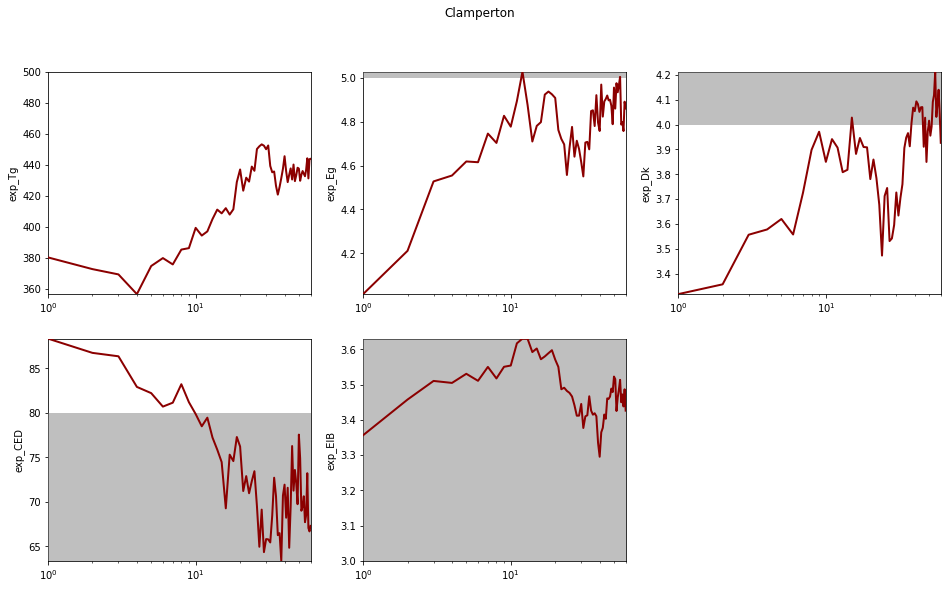

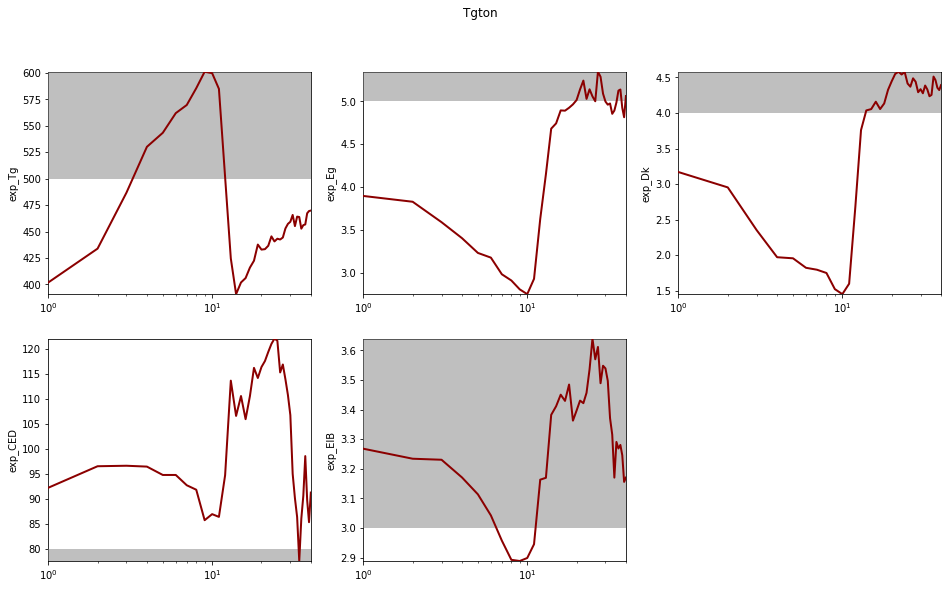

In [43]:
for i in range(10):
    planet.advance_time()   
df, fp_df = pga.load_planet('Clamprth')
plot_property_averages(df)

Age of planet Clamprth: 60
The polymers of Clamperton took 58.284 years to mature.
The polymers of Clamperton took 4.9168 years to graduate college.
The polymers of Clamperton worked for 0.0025 years.
The polymers of Clamperton emigrated over 0.0694 years.
The polymers of Tgton took 52.8953 years to mature.
The polymers of Tgton took 4.2721 years to graduate college.
The polymers of Tgton worked for 0.002 years.
The polymers of Tgton emigrated over 0.0466 years.
Age of land Clampland is 60
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.0044 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.2906 years to finish their census!
There are 143 polymers in the nation
After 0.0598 years they had children.
Generation 60 of Clamperton have all passed away
Age of land TgLand is 40
Tgton of TgLand advances through time
The polymers of Tgton worked for 0.0053 polyears.
The polymers of Tgton married!
The nation of Tgton took 0.2779 y

The polymers of Clamperton worked for 0.0026 years.
The polymers of Clamperton emigrated over 0.0442 years.
The polymers of Tgton took 130.9447 years to mature.
The polymers of Tgton took 4.1059 years to graduate college.
The polymers of Tgton worked for 0.002 years.
The polymers of Tgton emigrated over 0.0481 years.
Age of land Clampland is 67
Clamperton of Clampland advances through time
The polymers of Clamperton worked for 0.004 polyears.
The polymers of Clamperton married!
The nation of Clamperton took 0.2638 years to finish their census!
There are 150 polymers in the nation
After 0.0399 years they had children.
Generation 67 of Clamperton have all passed away
Age of land TgLand is 47
Tgton of TgLand advances through time
The polymers of Tgton worked for 0.0026 polyears.
The polymers of Tgton married!
The nation of Tgton took 0.2765 years to finish their census!
There are 150 polymers in the nation
After 0.0461 years they had children.
Generation 47 of Tgton have all passed away
A

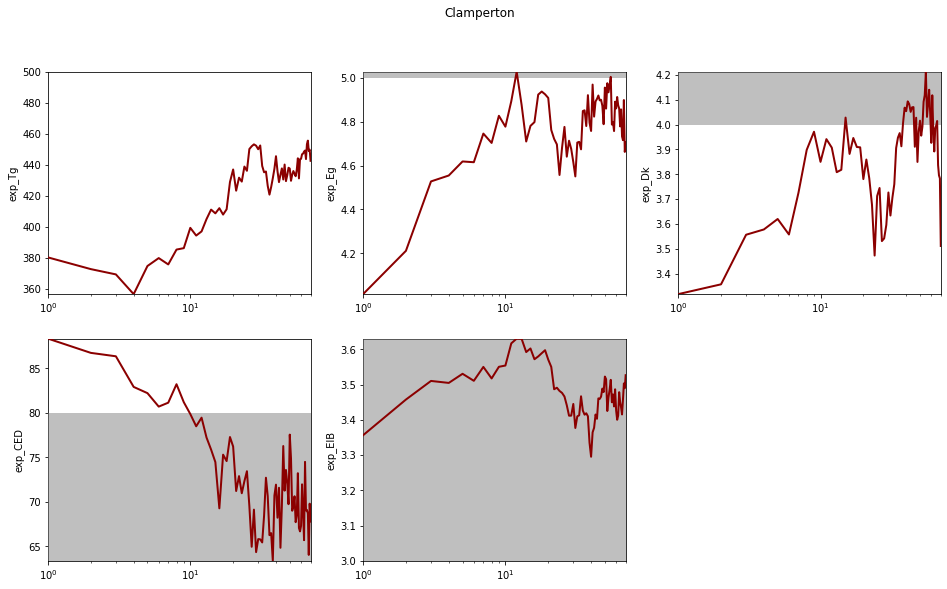

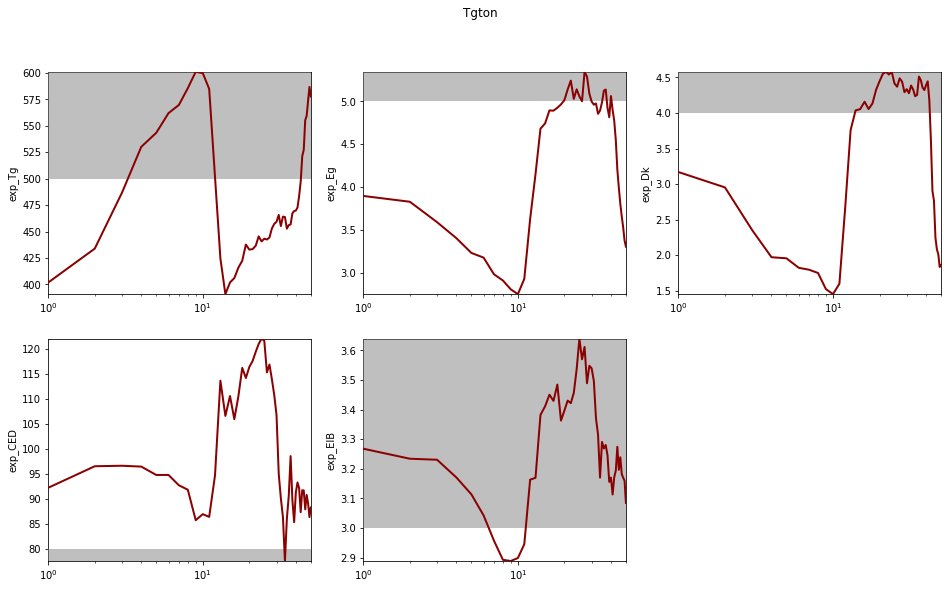

In [46]:
for i in range(10):
    planet.advance_time()   
df, fp_df = pga.load_planet('Clamprth')
plot_property_averages(df)

In [47]:
count_num_successful_pols(df)

Clamperton: 68 / 10339
Tgton: 32 / 7416
